# Data Exploration
---

## 0. Constants

In [334]:
FEATURES_DATA_PATH = "../data/raw/features.csv"
SALES_DATA_PATH = "../data/raw/sales.csv"
STORES_DATA_PATH = "../data/raw/stores.csv"

RAW_DATA_PATH = "../data/raw/raw.csv"
PREDICTION_DATA_PATH = "../data/raw/prediction.csv"

---
## 1. Imports

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.options.display.max_columns = 50
%matplotlib inline

sns.set_theme(style="darkgrid", palette="bright")

In [223]:
#For formatting dates in graphs
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format

In [22]:
stores_df = pd.read_csv(STORES_DATA_PATH)

In [23]:
features_df = pd.read_csv(FEATURES_DATA_PATH)

In [296]:
sales_df = pd.read_csv(SALES_DATA_PATH)

---
# 1.1 Functions

In [12]:
def inspect_data(df):
    print("-"*15, "Data Info", "-"*15, "\n")
    print(df.info(), "\n\n")
    
    print("-"*25, "Data Description: Numeric", "-"*25, "\n")
    print(df.describe(), "\n\n")
    
    print("-"*10, "Missing Values", "-"*10, "\n")
    print(df.isnull().sum(), "\n\n")
    
    print("-"*10, "Duplicate Values", "-"*10, "\n")
    print(df.duplicated().sum(), "\n\n")
    
    print("-"*10, "Unique Values", "-"*10, "\n")
    print(df.nunique(), "\n\n")

In [241]:
def plot_time_series(df, x, y, hue=None, title=""):
    fig, axes = plt.subplots(figsize=(16,8))
    sns.lineplot(df, x=x, y=y, hue=hue, errorbar=None)
    plt.title(title, fontsize=18)

    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(years_fmt)
    axes.xaxis.set_minor_locator(months)

    plt.xticks(rotation = 'vertical')
    plt.show()

---
## 2. Data Inspection

### Stores DataFrame

In [25]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
inspect_data(stores_df)

--------------- Data Info --------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None 


------------------------- Data Description ------------------------- 

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000 


---------- Missing Values ---------- 

Store    0
Type     0
Size     0
dtype: int64 


---------- Duplicate Values ---------- 

0 


---------- Unique Values ---------- 

Store    45
Type      3
Size     40
dtype: int64 




### Features Dataframe

In [27]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
inspect_data(features_df)

--------------- Data Info --------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None 


------------------------- Data Description ------------------------- 

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.00000

> **Insights:**
> - Date column to be converted to datetime 
> - Tempretaure is in Fehrenhite
> - CPI is in dollars $
> - IsHoliday is True only during special holidays. Confirm that.

In [71]:
#Sanity check of date format
features_df.Date.sample(10)

7024    02/03/2012
645     30/12/2011
3407    10/08/2012
5647    12/03/2010
3558    06/01/2012
698     04/01/2013
3748    02/03/2012
1216    22/06/2012
3133    05/11/2010
3328    04/02/2011
Name: Date, dtype: object

In [82]:
features_df.Date = pd.to_datetime(features_df.Date, format="%d/%m/%Y")
features_df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [83]:
#Sanity check of date format
features_df.Date.sample(10)

2149   2012-11-30
8167   2013-02-22
1353   2011-12-08
7341   2011-08-04
7310   2010-03-09
298    2012-04-27
471    2012-02-24
1966   2012-11-23
4173   2013-03-05
6964   2011-07-01
Name: Date, dtype: datetime64[ns]

### Sales DataFrame

In [297]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [14]:
inspect_data(sales_df)

--------------- Data Info --------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None 


------------------------- Data Description ------------------------- 

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.0

> **Insights:**
> - Date column to be converted to datetime 
> - Date unique values differ & are less than in `features_df`. This is due to `features_df` has dates for the following year.
> - Weekly sales are in dollars $

In [79]:
#Sanity check of date format
sales_df.Date.sample(10)

389271    06/04/2012
236013    23/12/2011
241811    21/09/2012
80658     26/10/2012
275660    29/10/2010
245762    01/06/2012
151489    02/09/2011
12697     04/02/2011
166795    24/09/2010
272448    22/04/2011
Name: Date, dtype: object

In [363]:
sales_df.Date = pd.to_datetime(sales_df.Date, format="%d/%m/%Y")
sales_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [89]:
#Sanity check of date format
sales_df.Date.sample(10)

116377   2010-10-29
268189   2011-05-06
392565   2011-06-24
87802    2012-09-07
418759   2010-10-22
238437   2011-02-11
133063   2012-10-26
278186   2011-11-11
151802   2012-03-09
206448   2012-04-06
Name: Date, dtype: datetime64[ns]

In [196]:
#First & Last Dates in both Features & Sales DataFrames
print("Features' First Date is: ", features_df.Date.min())
print("Sales' First Date is: ", sales_df.Date.min())
print("Features' Last Date is: ", features_df.Date.max())
print("Sales' Last Date is: ", sales_df.Date.max())

Features' First Date is:  2010-01-10 00:00:00
Sales' First Date is:  2010-02-05 00:00:00
Features' Last Date is:  2013-12-07 00:00:00
Sales' Last Date is:  2012-10-26 00:00:00


> **We see that there are mismatching between the date ranges in both DataFrames.**

In [327]:
#number of unique departments for each store
sales_df.groupby("Store").agg({"Dept":"nunique"})

,Dept
Store,
1,77
2,78
3,72
4,78
5,72
6,77
7,76
8,76
9,73


>**It seems that not all stores have the same number departments. Probably this is due to the size of stores.**

---
## 3. Data Visualization

### Stores

In [115]:
stores_agg = stores_df.groupby("Type").mean()["Size"].to_frame().reset_index()
stores_agg

,Type,Size
0,A,177247.727273
1,B,101190.705882
2,C,40541.666667


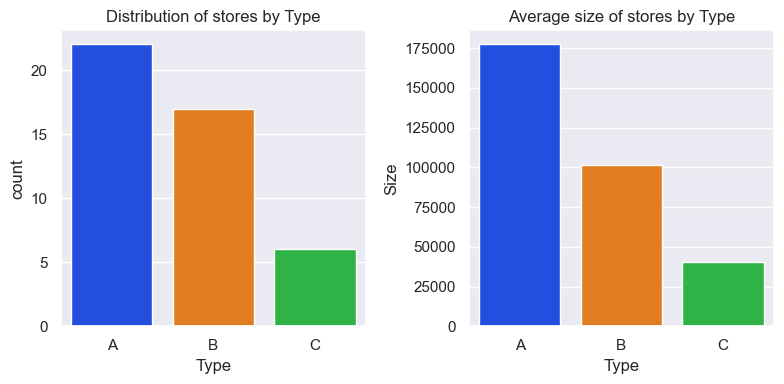

In [182]:
fig, ax = plt.subplots(1,2, figsize= (8,4))

plt.subplot(1,2,1)
sns.countplot(stores_df, x="Type")
plt.title("Distribution of stores by Type")

plt.subplot(1,2,2)
sns.barplot(stores_agg, x="Type", y="Size")
plt.title("Average size of stores by Type")

fig.tight_layout()

### Features

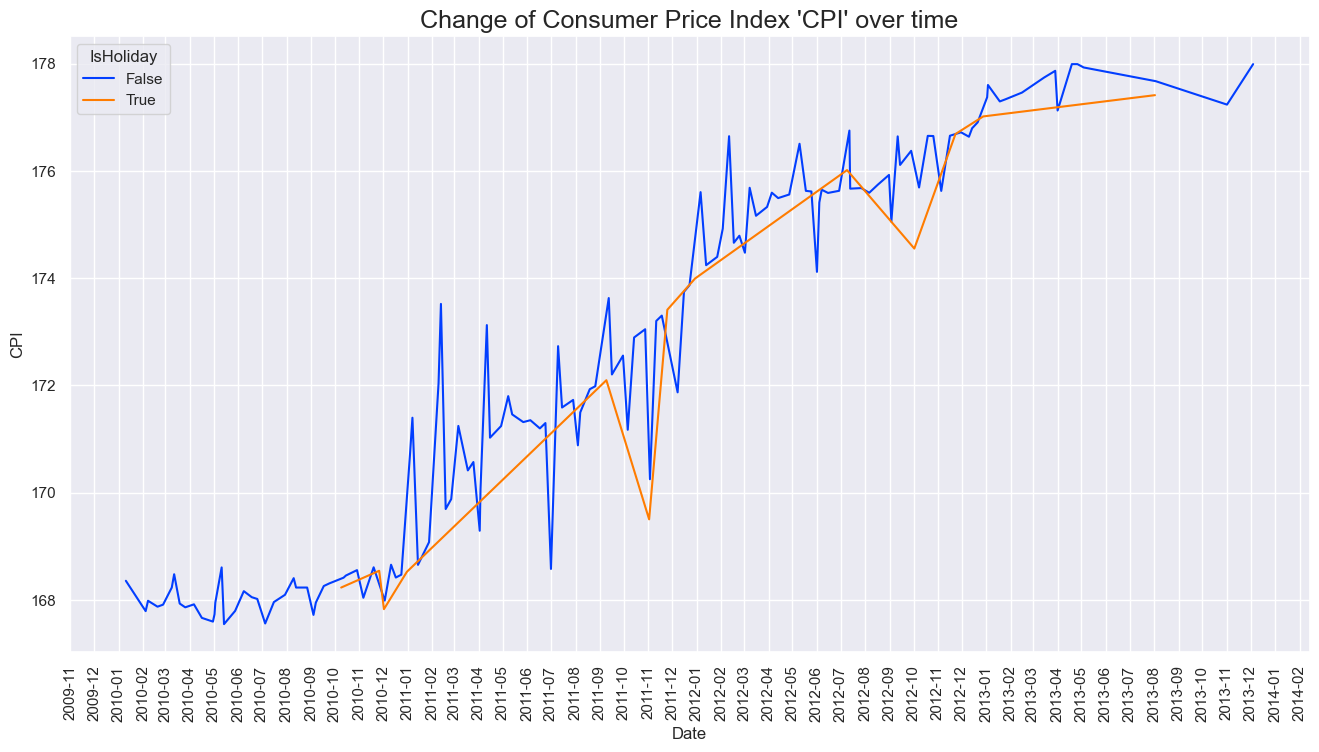

In [242]:
plot_time_series(df=features_df, x="Date", y="CPI", 
                 hue="IsHoliday", title="Change of Consumer Price Index 'CPI' over time")

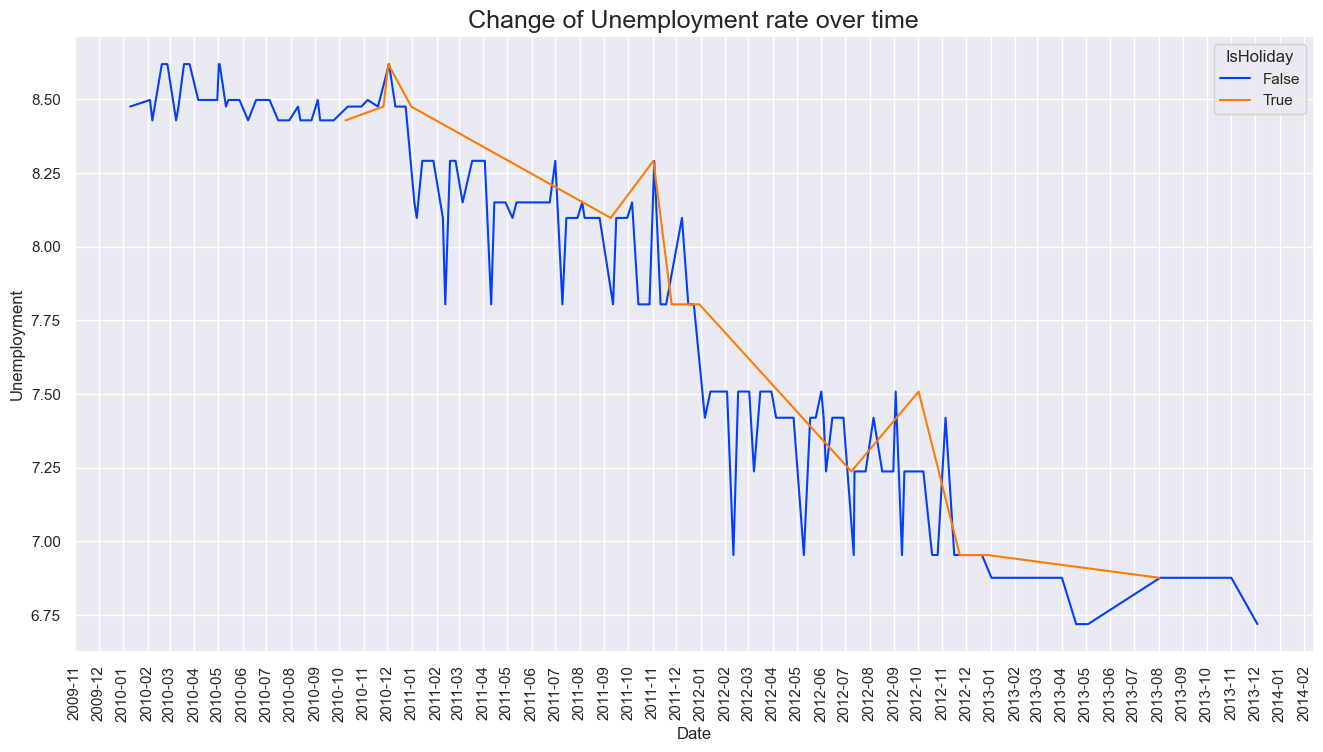

In [243]:
plot_time_series(df=features_df, x="Date", y="Unemployment", 
                 hue="IsHoliday", title="Change of Unemployment rate over time")

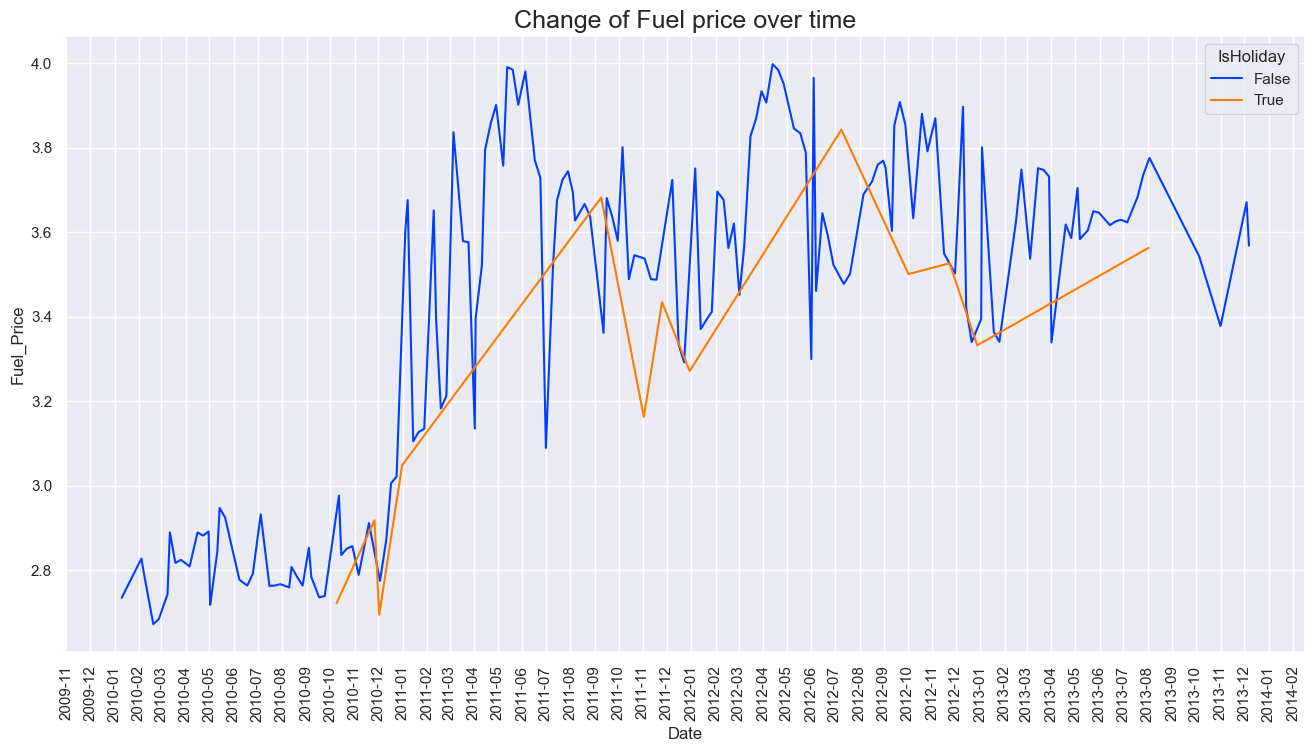

In [244]:
plot_time_series(df=features_df, x="Date", y="Fuel_Price", 
                 hue="IsHoliday", title="Change of Fuel price over time")

### Zoom In: Plot Fuel, CPI & Unemployment during Holiday months
Holiday months are: 
* February
* September
* Nobember 
* December

In [227]:
#select Dates based on holiday months only
holiday_months = [2,9,11,12]
features_holiday = features_df[features_df.Date.dt.month.isin(holiday_months)]

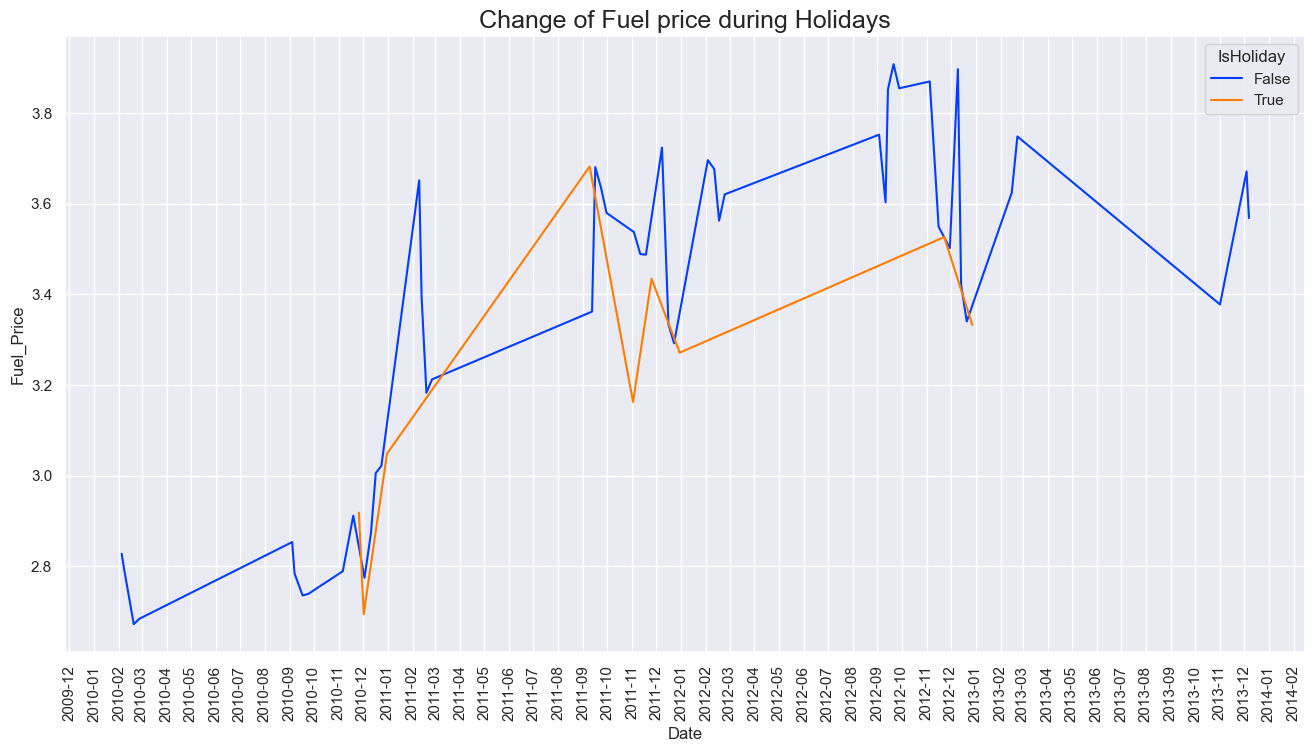

In [245]:
#Plot Fuel price during Holiday months
plot_time_series(features_holiday, x="Date", y="Fuel_Price",
                 hue="IsHoliday", title="Change of Fuel price during Holidays")

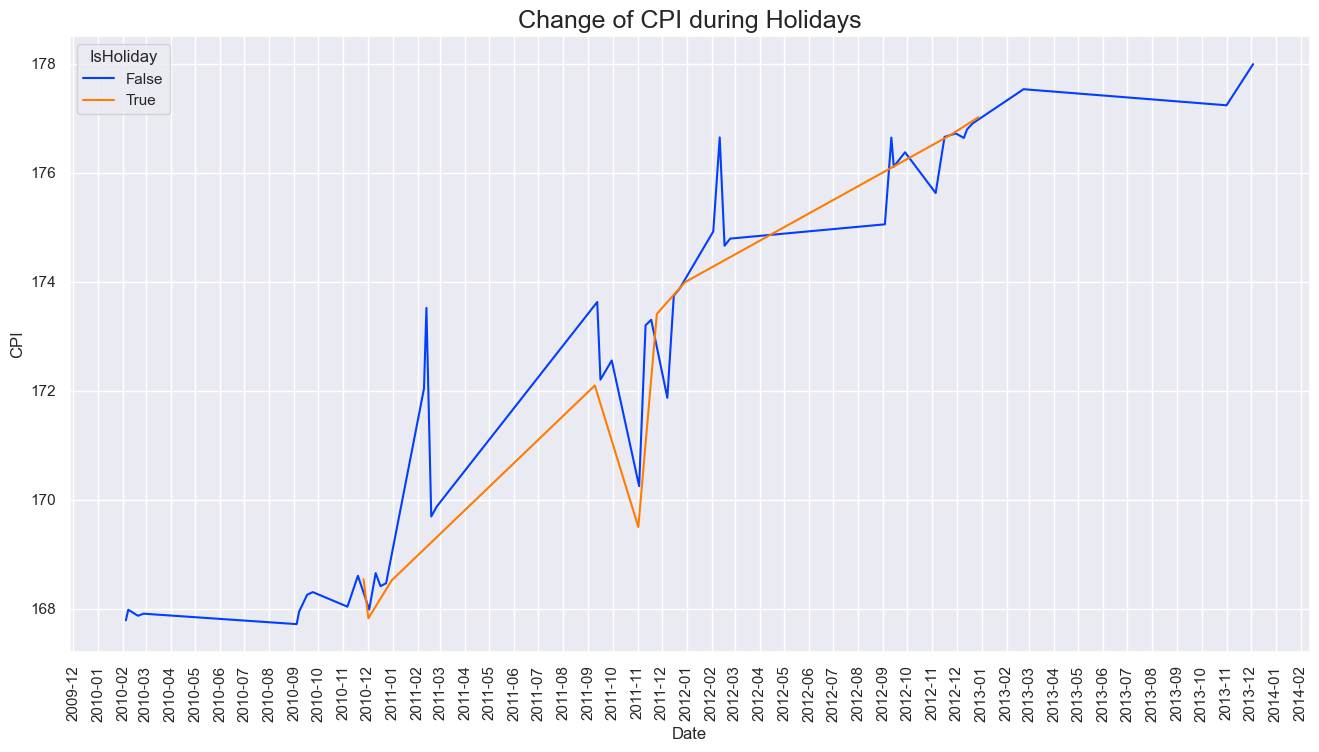

In [246]:
#Plot CPI during Holiday months
plot_time_series(features_holiday, x="Date", y="CPI",
                 hue="IsHoliday", title="Change of CPI during Holidays")

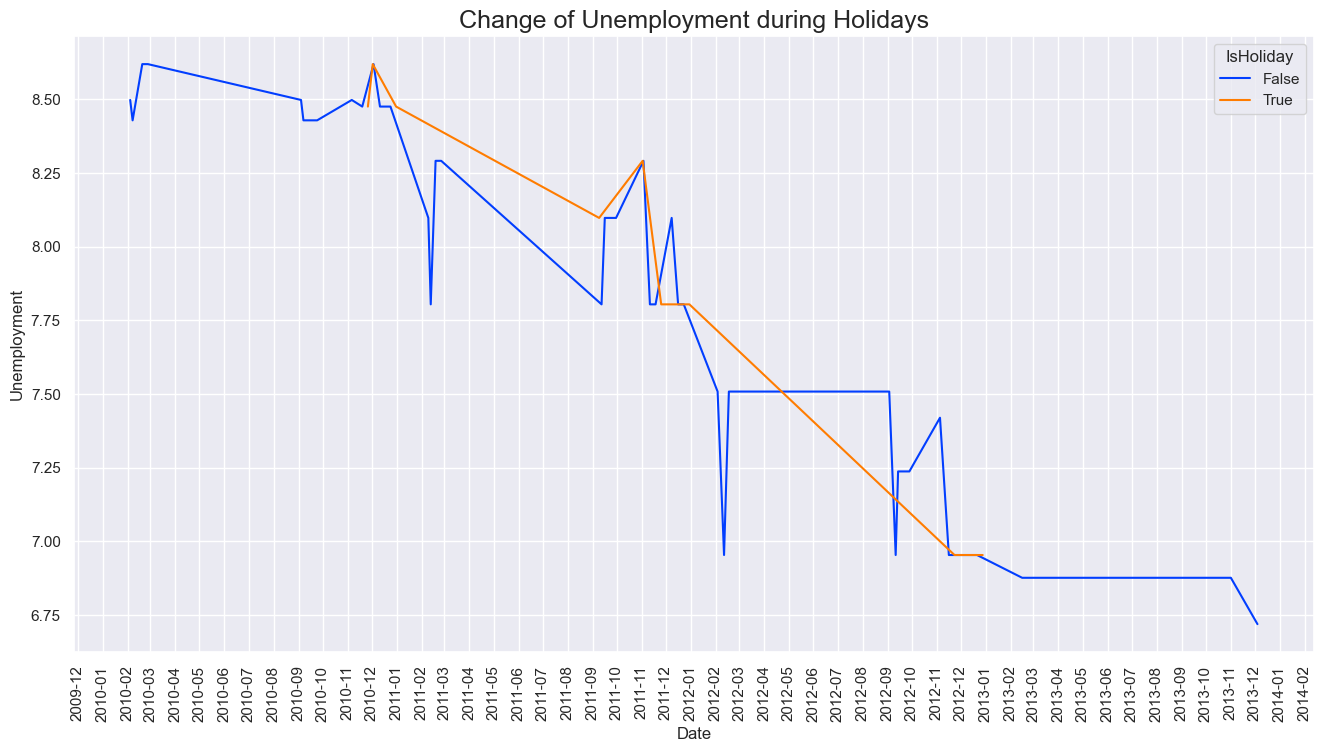

In [256]:
#Plot Unemployment during Holiday months
plot_time_series(df=features_holiday, x="Date", y="Unemployment", 
                 hue="IsHoliday", title="Change of Unemployment during Holidays")

### Sales

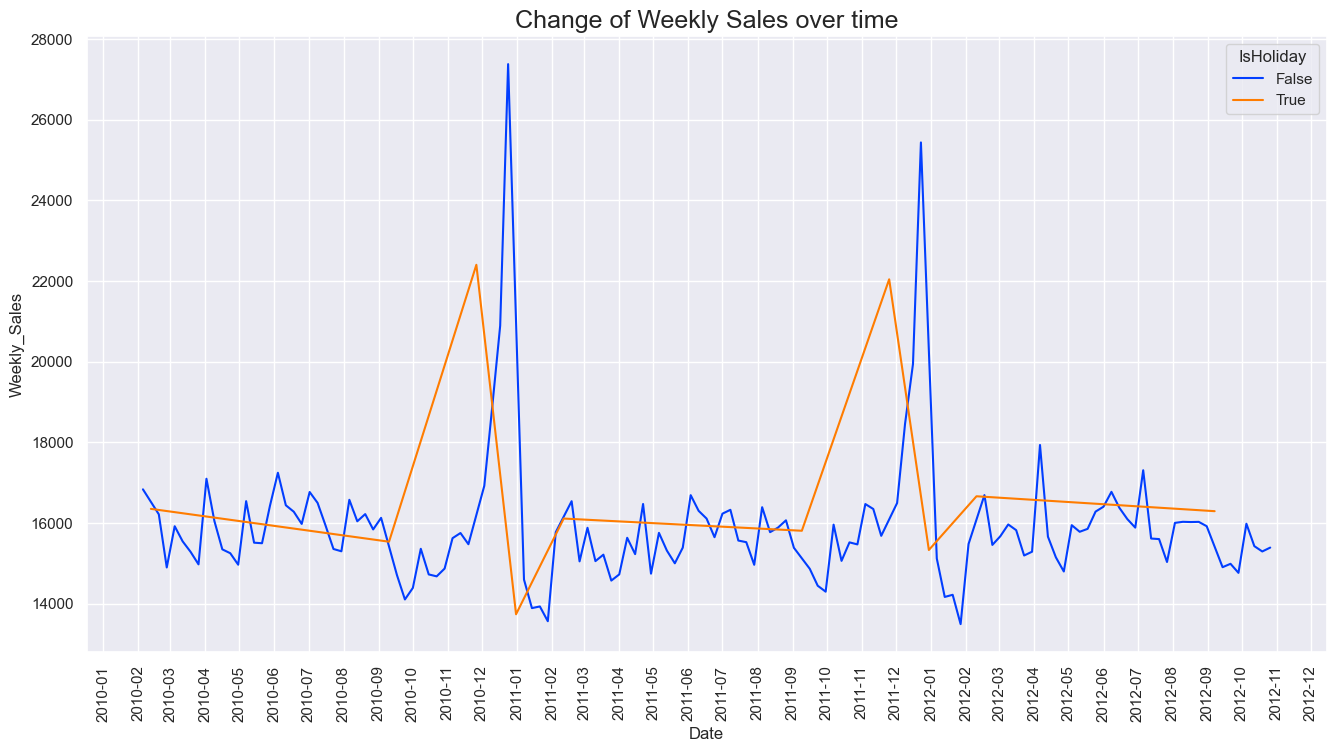

In [248]:
#Plot Weekly sales over time
plot_time_series(df=sales_df, x="Date", y="Weekly_Sales", 
                 hue="IsHoliday", title="Change of Weekly Sales over time")

### Zoom In: Plot Weekly Sales during Holiday months
Holiday months are: 
* February
* September
* Nobember 
* December

In [234]:
#select Dates based on holiday months only
sales_holiday = sales_df[sales_df.Date.dt.month.isin(holiday_months)]

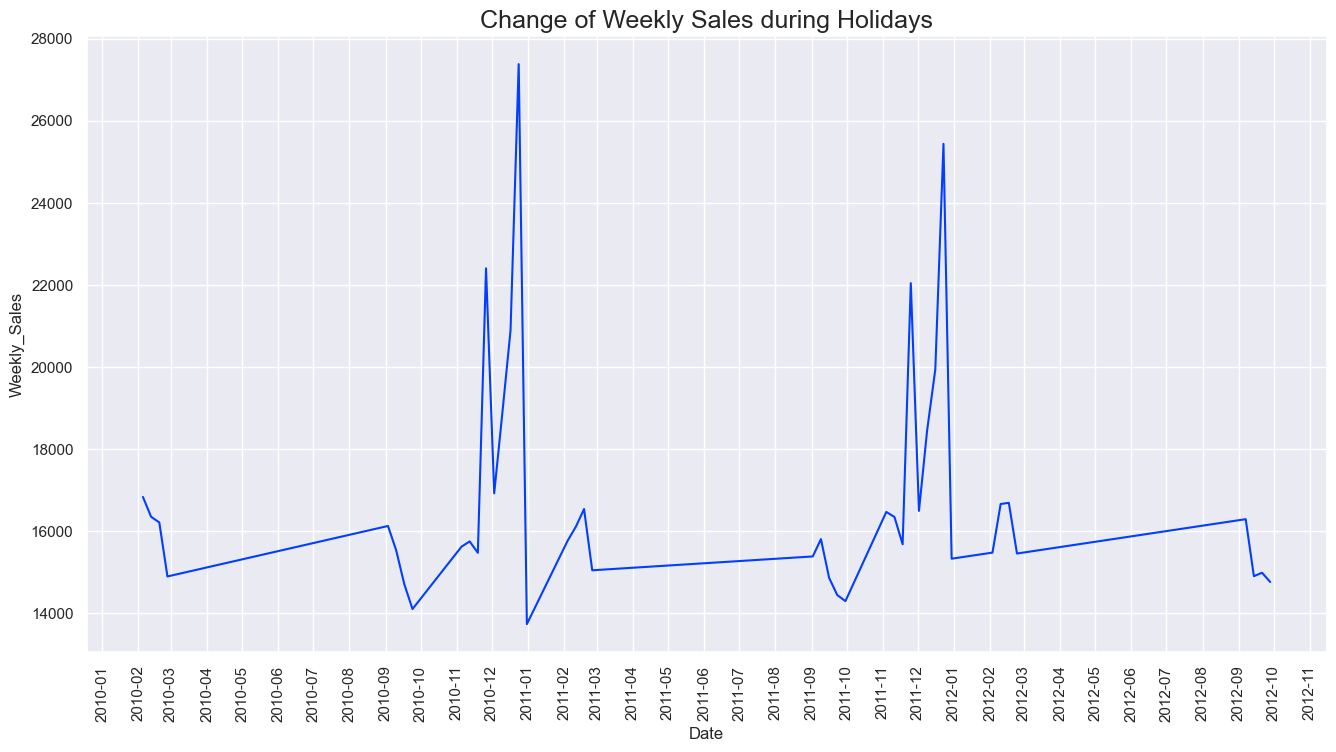

In [254]:
#Plot Weekly sales during Holidays
plot_time_series(df=sales_holiday, x="Date", y="Weekly_Sales", 
                 hue=None, title="Change of Weekly Sales during Holidays")

In [319]:
sales_dept = sales_df.groupby("Dept").agg({"Weekly_Sales":"sum"})
sales_dept.Weekly_Sales = sales_dept.Weekly_Sales.div(1000000, axis=0)
sales_dept.sort_values("Weekly_Sales" ,ascending=False)

,Weekly_Sales
Dept,
92,483.943342
95,449.320163
38,393.118137
72,305.725152
90,291.068464
...,...
51,0.030573
78,0.001715
39,0.000178


>**Department 94 has the largest weekly sales with revenue of around 484 million dollars. On the other side, Department 47 has the lowest weekly sales with a loss of 4963$**

Text(0.5, 0, 'Department')

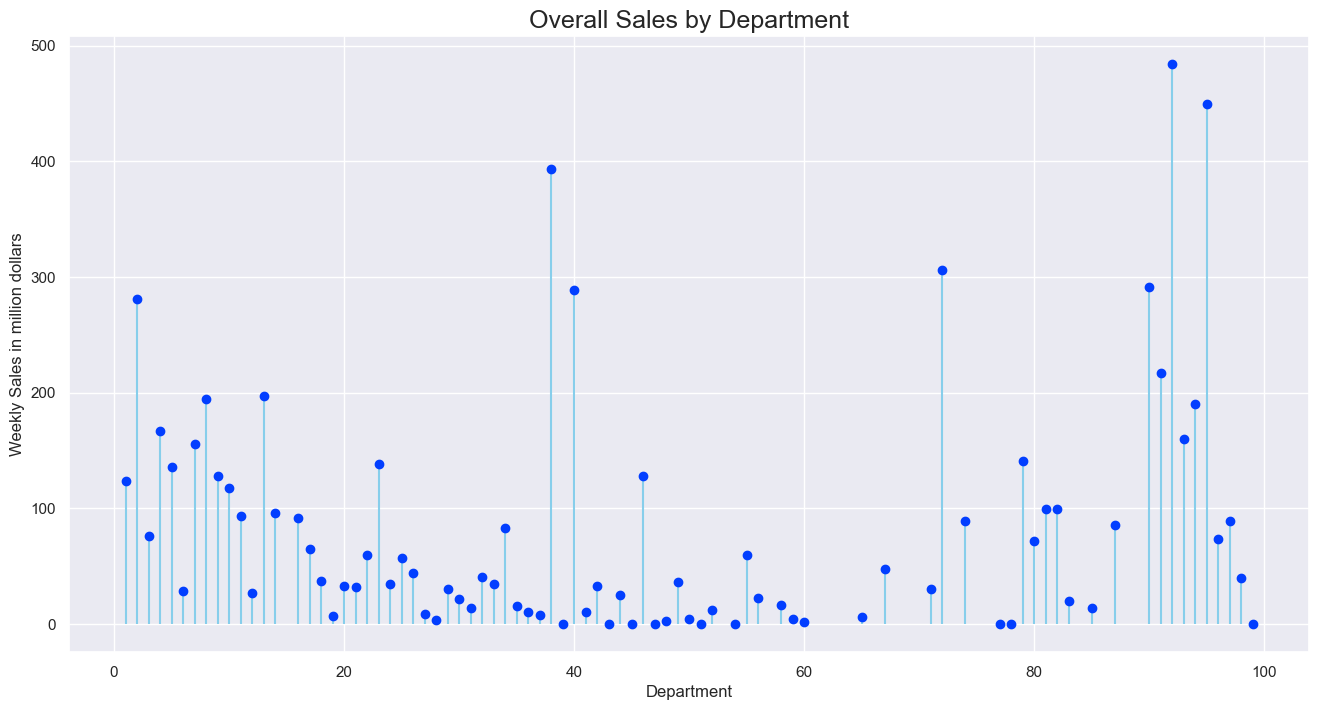

In [323]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.vlines(x=sales_dept.index, ymin=0, ymax=sales_dept['Weekly_Sales'], color='skyblue')
plt.plot(sales_dept.index, sales_dept['Weekly_Sales'], "o")
plt.title("Overall Sales by Department", fontsize=18)
# plt.xticks(ticks=range(1,101), labels=str(range(1,101)))
plt.ylabel("Weekly Sales in million dollars")
plt.xlabel("Department")

> **Some departments exceed weekly sales of 200 million dollars.**

---
## 4. Merge DataFrames

In [251]:
merged_df = pd.merge(sales_df, features_df, how="left", on=['Store','Date', 'IsHoliday'])
merged_df = pd.merge(merged_df, stores_df, how='left', on=['Store'])
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,2010-02-12,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


In [309]:
type_sales_df = merged_df.groupby("Type").agg({"Weekly_Sales":"sum"}).reset_index()
type_sales_df

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


Text(0.5, 1.0, 'Overall sales by store Type')

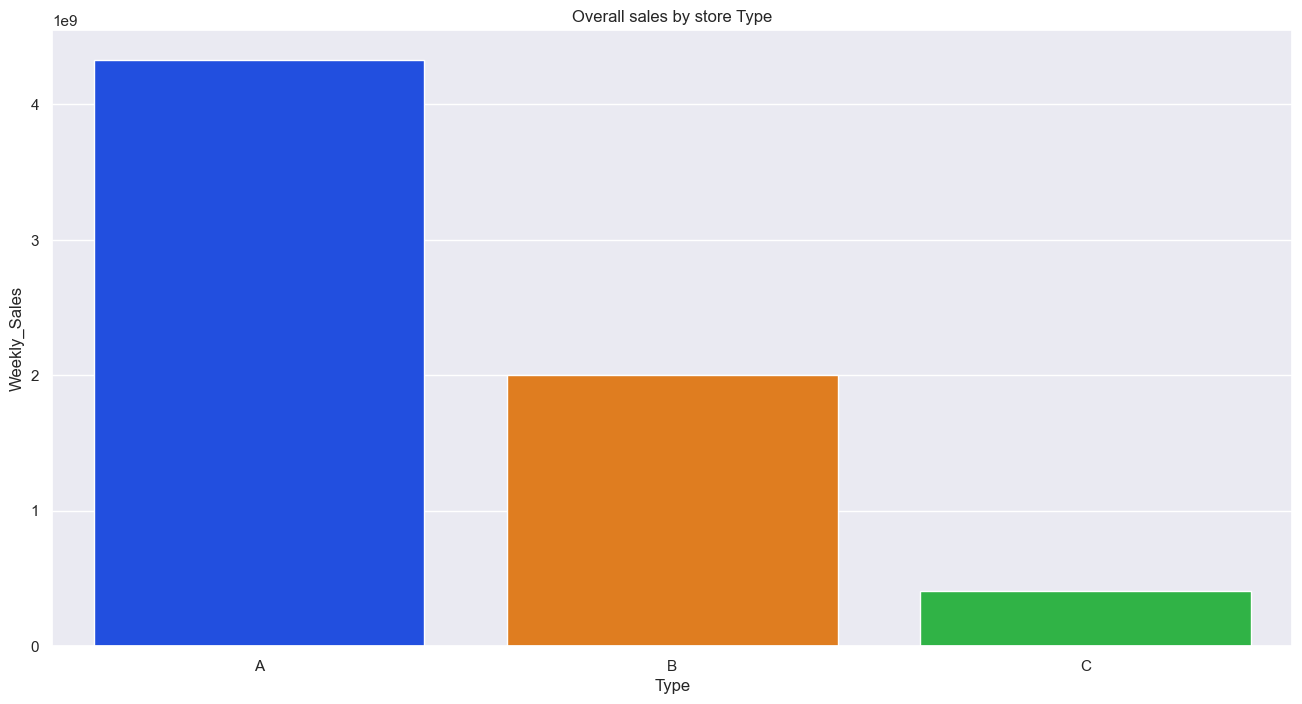

In [311]:
plt.figure(figsize=(16, 8))

sns.barplot(type_sales_df, x="Type", y="Weekly_Sales")
plt.title("Overall sales by store Type")

> Its obvious that the bigger the store type, the higher the weekly sales.

In [371]:
features_df.Date.min(), features_df.Date.max()

(Timestamp('2010-01-10 00:00:00'), Timestamp('2013-12-07 00:00:00'))

In [372]:
sales_df.Date.min(), sales_df.Date.max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [373]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

### 4.1 Separate the following year data for predictions

**Check date difference between `features_df` & `sales_df`**

In [357]:
features_df[features_df.Store ==3].Date.min(), features_df[features_df.Store ==3].Date.max(), len(features_df[features_df.Store ==1].Date)

(Timestamp('2010-01-10 00:00:00'), Timestamp('2013-12-07 00:00:00'), 182)

In [364]:
sales_df[(sales_df.Store ==3) & (sales_df.Dept ==1)].Date.min(), sales_df[(sales_df.Store ==3) & (sales_df.Dept ==1)].Date.max(), len(sales_df[(sales_df.Store ==3) & (sales_df.Dept ==1)].Date)

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'), 143)

**Create `features_df_new_year`**

In [332]:
features_df_new_year = features_df[features_df.Date > "2012-10-26"]
features_df_new_year

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
118,1,2012-11-05,73.77,3.688,8351.40,NaN,10.52,2443.14,3127.88,221.725663,7.143,False
140,1,2012-12-10,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False
145,1,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False
146,1,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True
147,1,2012-11-30,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [333]:
features_df_new_year.Date.min(), features_df_new_year.Date.max()

(Timestamp('2012-11-05 00:00:00'), Timestamp('2013-12-07 00:00:00'))

In [338]:
len(features_df_new_year.Store.unique())

45

In [370]:
len(features_df_new_year[features_df_new_year["Store"]==3].Date)

38

**Create `dept_df` to add departments to `features_df_new_year`**

In [396]:
#create department dataframe to merge with the new year dataframe
dept_df = sales_df.drop(["Date", "Weekly_Sales", "IsHoliday"], axis=1)

In [399]:
dept_df = dept_df.drop_duplicates().reset_index(drop=True)

In [400]:
dept_df

,Store,Dept
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
3326,45,94
3327,45,95
3328,45,96
3329,45,97


In [405]:
merged_df_new_year = pd.merge(features_df_new_year, dept_df, how="left", on=['Store'])
merged_df_new_year = pd.merge(merged_df_new_year, stores_df, how='left', on=['Store'])

In [407]:
merged_df_new_year.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size
0,1,2012-11-05,73.77,3.688,8351.4,NaN,10.52,2443.14,3127.88,221.725663,7.143,False,1,A,151315
1,1,2012-11-05,73.77,3.688,8351.4,NaN,10.52,2443.14,3127.88,221.725663,7.143,False,2,A,151315
2,1,2012-11-05,73.77,3.688,8351.4,NaN,10.52,2443.14,3127.88,221.725663,7.143,False,3,A,151315
3,1,2012-11-05,73.77,3.688,8351.4,NaN,10.52,2443.14,3127.88,221.725663,7.143,False,4,A,151315
4,1,2012-11-05,73.77,3.688,8351.4,NaN,10.52,2443.14,3127.88,221.725663,7.143,False,5,A,151315


In [408]:
len(merged_df_new_year)

126578

---
## 5. Save Final Data

In [258]:
merged_df.to_csv(RAW_DATA_PATH, index=False, header=True)

In [409]:
merged_df_new_year.to_csv(PREDICTION_DATA_PATH, index=False, header=True)